In [53]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [54]:
# read two input images
ImT1_L = cv2.imread('./dataset/sequences/03/image_0/000001.png', 0)  # 0 flag returns a grayscale image
ImT1_R = cv2.imread('./dataset/sequences/03/image_1/000001.png', 0)

ImT2_L = cv2.imread('./dataset/sequences/03/image_0/000002.png', 0)
ImT2_R = cv2.imread('./dataset/sequences/03/image_1/000002.png', 0)

In [61]:
def Features(image1, image2):
    img1_copy = image1.copy()
    img2_copy = image2.copy()
    orb = cv2.ORB_create(nfeatures=5000)
    kp1, f1 = orb.detectAndCompute(img1_copy, None)
    kp2, f2 = orb.detectAndCompute(img2_copy, None)
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    points = bf.match(f1, f2)
    matches = sorted(points, key=lambda x: x.distance)
    match_img = cv2.drawMatches(
        img1_copy, kp1, img2_copy, kp2, matches[: 1000], None)
    plt.figure(figsize=(10, 50)
    plt.imshow(match_img)
    #plt.show()
    print("Number of matches: ", len(matches))
    pt1 = np.float32([kp1[i.queryIdx].pt for i in matches])
    pt2 = np.float32([kp2[j.trainIdx].pt for j in matches])
    return pt1, pt2

SyntaxError: invalid syntax (<ipython-input-61-d5c71175a7e4>, line 13)

Number of matches:  2700


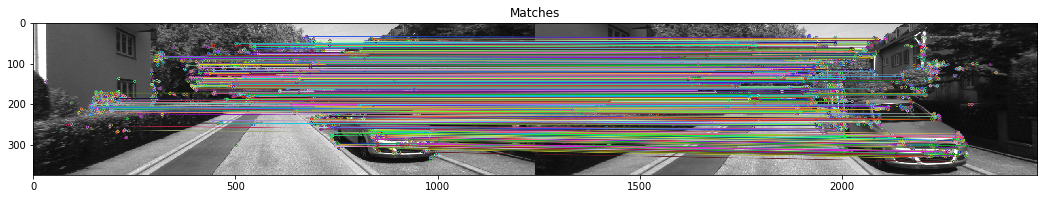

In [62]:
pt1, pt2 = Features(ImT1_L, ImT2_L)